In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: GD
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


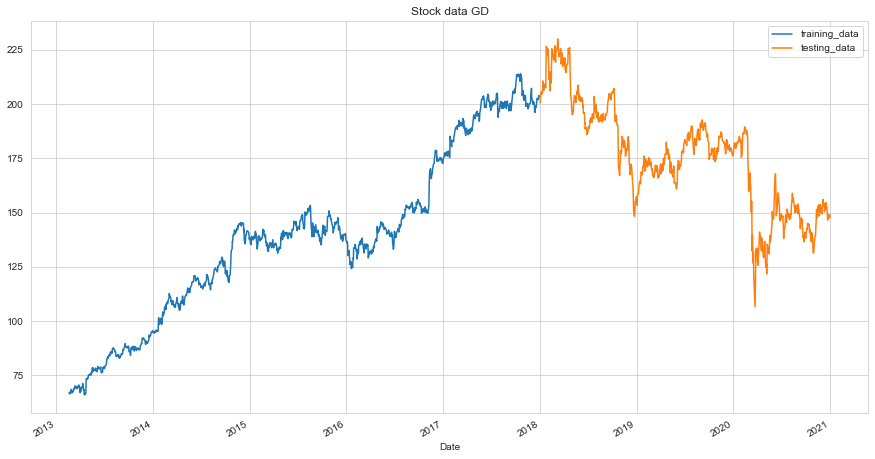

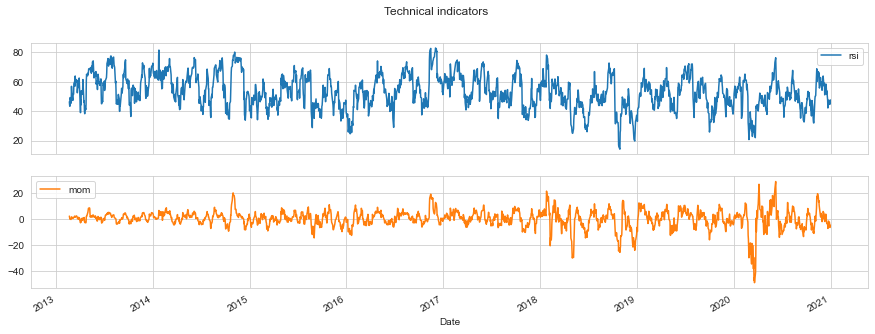

In [2]:
stock_name = 'gd'.upper()
industry = 'Industrial'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1531.26, duration: 0:00:00.341074
episode: 2/2000, episode end value: 1563.29, duration: 0:00:00.271063
episode: 3/2000, episode end value: 1528.53, duration: 0:00:00.274057
episode: 4/2000, episode end value: 1537.92, duration: 0:00:00.281063
episode: 5/2000, episode end value: 1538.34, duration: 0:00:00.305068
episode: 6/2000, episode end value: 1550.43, duration: 0:00:00.304069
episode: 7/2000, episode end value: 1584.49, duration: 0:00:00.328076
episode: 8/2000, episode end value: 1598.39, duration: 0:00:00.278538
episode: 9/2000, episode end value: 1525.32, duration: 0:00:00.309071
episode: 10/2000, episode end value: 1624.44, duration: 0:00:00.279063
episode: 11/2000, episode end value: 1516.08, duration: 0:00:00.287737
episode: 12/2000, episode end value: 1528.38, duration: 0:00:00.298140
episode: 13/2000, episode end value: 1534.26, duration: 0:00:00.274058
episode: 14/2000, episode end value: 1617.97, duration: 0:00:00.283062
episode: 15/200

episode: 117/2000, episode end value: 1530.60, duration: 0:00:00.472185
episode: 118/2000, episode end value: 1532.45, duration: 0:00:00.444963
episode: 119/2000, episode end value: 1525.42, duration: 0:00:00.540686
episode: 120/2000, episode end value: 1530.43, duration: 0:00:00.545740
episode: 121/2000, episode end value: 1526.75, duration: 0:00:00.553126
episode: 122/2000, episode end value: 1532.83, duration: 0:00:00.597135
episode: 123/2000, episode end value: 1531.88, duration: 0:00:00.514117
episode: 124/2000, episode end value: 1526.33, duration: 0:00:00.554705
episode: 125/2000, episode end value: 1526.74, duration: 0:00:00.541316
episode: 126/2000, episode end value: 1529.69, duration: 0:00:00.460881
episode: 127/2000, episode end value: 1531.40, duration: 0:00:00.424314
episode: 128/2000, episode end value: 1531.15, duration: 0:00:00.445128
episode: 129/2000, episode end value: 1531.60, duration: 0:00:00.465431
episode: 130/2000, episode end value: 1531.01, duration: 0:00:00

episode: 231/2000, episode end value: 1531.79, duration: 0:00:00.528957
episode: 232/2000, episode end value: 1530.45, duration: 0:00:00.545965
episode: 233/2000, episode end value: 1531.77, duration: 0:00:00.510181
episode: 234/2000, episode end value: 1531.12, duration: 0:00:00.475849
episode: 235/2000, episode end value: 1531.35, duration: 0:00:00.502082
episode: 236/2000, episode end value: 1530.83, duration: 0:00:00.442991
episode: 237/2000, episode end value: 1531.35, duration: 0:00:00.442031
episode: 238/2000, episode end value: 1536.31, duration: 0:00:00.483333
episode: 239/2000, episode end value: 1530.77, duration: 0:00:00.490099
episode: 240/2000, episode end value: 1532.72, duration: 0:00:00.516723
episode: 241/2000, episode end value: 1531.98, duration: 0:00:00.435529
episode: 242/2000, episode end value: 1532.27, duration: 0:00:00.447682
episode: 243/2000, episode end value: 1532.38, duration: 0:00:00.472359
episode: 244/2000, episode end value: 1530.85, duration: 0:00:00

episode: 345/2000, episode end value: 1533.21, duration: 0:00:00.453568
episode: 346/2000, episode end value: 1532.84, duration: 0:00:00.545463
episode: 347/2000, episode end value: 1533.08, duration: 0:00:00.562395
episode: 348/2000, episode end value: 1532.57, duration: 0:00:00.488376
episode: 349/2000, episode end value: 1532.10, duration: 0:00:00.576055
episode: 350/2000, episode end value: 1532.87, duration: 0:00:00.547193
episode: 351/2000, episode end value: 1532.56, duration: 0:00:00.496913
episode: 352/2000, episode end value: 1531.93, duration: 0:00:00.539754
episode: 353/2000, episode end value: 1532.70, duration: 0:00:00.532803
episode: 354/2000, episode end value: 1532.67, duration: 0:00:00.467895
episode: 355/2000, episode end value: 1532.63, duration: 0:00:00.509532
episode: 356/2000, episode end value: 1532.15, duration: 0:00:00.474822
episode: 357/2000, episode end value: 1532.58, duration: 0:00:00.442517
episode: 358/2000, episode end value: 1533.45, duration: 0:00:00

episode: 459/2000, episode end value: 1577.59, duration: 0:00:00.328426
episode: 460/2000, episode end value: 1577.94, duration: 0:00:00.303590
episode: 461/2000, episode end value: 1531.33, duration: 0:00:00.414336
episode: 462/2000, episode end value: 1592.65, duration: 0:00:00.383617
episode: 463/2000, episode end value: 1531.90, duration: 0:00:00.393188
episode: 464/2000, episode end value: 1541.98, duration: 0:00:00.356090
episode: 465/2000, episode end value: 1533.10, duration: 0:00:00.447216
episode: 466/2000, episode end value: 1547.35, duration: 0:00:00.504108
episode: 467/2000, episode end value: 1537.82, duration: 0:00:00.433155
episode: 468/2000, episode end value: 1529.06, duration: 0:00:00.534335
episode: 469/2000, episode end value: 1528.10, duration: 0:00:00.524484
episode: 470/2000, episode end value: 1650.42, duration: 0:00:00.339235
episode: 471/2000, episode end value: 1631.35, duration: 0:00:00.423843
episode: 472/2000, episode end value: 1577.00, duration: 0:00:00

episode: 573/2000, episode end value: 1531.34, duration: 0:00:00.523482
episode: 574/2000, episode end value: 1530.89, duration: 0:00:00.521934
episode: 575/2000, episode end value: 1533.50, duration: 0:00:00.450438
episode: 576/2000, episode end value: 1533.60, duration: 0:00:00.469356
episode: 577/2000, episode end value: 1532.95, duration: 0:00:00.461006
episode: 578/2000, episode end value: 1532.46, duration: 0:00:00.487305
episode: 579/2000, episode end value: 1531.44, duration: 0:00:00.452480
episode: 580/2000, episode end value: 1529.64, duration: 0:00:00.525216
episode: 581/2000, episode end value: 1531.71, duration: 0:00:00.428552
episode: 582/2000, episode end value: 1532.51, duration: 0:00:00.462190
episode: 583/2000, episode end value: 1533.14, duration: 0:00:00.528054
episode: 584/2000, episode end value: 1532.71, duration: 0:00:00.446038
episode: 585/2000, episode end value: 1533.66, duration: 0:00:00.424993
episode: 586/2000, episode end value: 1532.81, duration: 0:00:00

episode: 687/2000, episode end value: 1531.08, duration: 0:00:00.430102
episode: 688/2000, episode end value: 1531.49, duration: 0:00:00.488295
episode: 689/2000, episode end value: 1533.14, duration: 0:00:00.488053
episode: 690/2000, episode end value: 1532.43, duration: 0:00:00.572181
episode: 691/2000, episode end value: 1531.36, duration: 0:00:00.443508
episode: 692/2000, episode end value: 1532.76, duration: 0:00:00.455851
episode: 693/2000, episode end value: 1532.70, duration: 0:00:00.526536
episode: 694/2000, episode end value: 1532.92, duration: 0:00:00.496008
episode: 695/2000, episode end value: 1534.36, duration: 0:00:00.431015
episode: 696/2000, episode end value: 1531.88, duration: 0:00:00.421372
episode: 697/2000, episode end value: 1533.34, duration: 0:00:00.488394
episode: 698/2000, episode end value: 1532.18, duration: 0:00:00.473529
episode: 699/2000, episode end value: 1531.86, duration: 0:00:00.451127
episode: 700/2000, episode end value: 1532.34, duration: 0:00:00

episode: 801/2000, episode end value: 1532.05, duration: 0:00:00.459954
episode: 802/2000, episode end value: 1533.42, duration: 0:00:00.440941
episode: 803/2000, episode end value: 1533.26, duration: 0:00:00.473049
episode: 804/2000, episode end value: 1530.98, duration: 0:00:00.476422
episode: 805/2000, episode end value: 1531.23, duration: 0:00:00.524499
episode: 806/2000, episode end value: 1530.70, duration: 0:00:00.448284
episode: 807/2000, episode end value: 1533.08, duration: 0:00:00.510160
episode: 808/2000, episode end value: 1535.17, duration: 0:00:00.424816
episode: 809/2000, episode end value: 1531.57, duration: 0:00:00.443348
episode: 810/2000, episode end value: 1530.69, duration: 0:00:00.468747
episode: 811/2000, episode end value: 1531.02, duration: 0:00:00.529687
episode: 812/2000, episode end value: 1523.21, duration: 0:00:00.303291
episode: 813/2000, episode end value: 1527.90, duration: 0:00:00.487642
episode: 814/2000, episode end value: 1522.31, duration: 0:00:00

episode: 915/2000, episode end value: 1556.62, duration: 0:00:00.390094
episode: 916/2000, episode end value: 1526.25, duration: 0:00:00.330363
episode: 917/2000, episode end value: 1549.61, duration: 0:00:00.363421
episode: 918/2000, episode end value: 1567.32, duration: 0:00:00.376277
episode: 919/2000, episode end value: 1603.50, duration: 0:00:00.372789
episode: 920/2000, episode end value: 1563.24, duration: 0:00:00.388362
episode: 921/2000, episode end value: 1587.33, duration: 0:00:00.457752
episode: 922/2000, episode end value: 1566.34, duration: 0:00:00.332932
episode: 923/2000, episode end value: 1553.47, duration: 0:00:00.365059
episode: 924/2000, episode end value: 1560.21, duration: 0:00:00.341419
episode: 925/2000, episode end value: 1614.31, duration: 0:00:00.349598
episode: 926/2000, episode end value: 1658.88, duration: 0:00:00.355383
episode: 927/2000, episode end value: 1583.93, duration: 0:00:00.441771
episode: 928/2000, episode end value: 1583.88, duration: 0:00:00

episode: 1029/2000, episode end value: 1531.57, duration: 0:00:00.457369
episode: 1030/2000, episode end value: 1530.74, duration: 0:00:00.510560
episode: 1031/2000, episode end value: 1533.12, duration: 0:00:00.419899
episode: 1032/2000, episode end value: 1530.42, duration: 0:00:00.444110
episode: 1033/2000, episode end value: 1531.50, duration: 0:00:00.410861
episode: 1034/2000, episode end value: 1530.18, duration: 0:00:00.439422
episode: 1035/2000, episode end value: 1531.17, duration: 0:00:00.455997
episode: 1036/2000, episode end value: 1531.85, duration: 0:00:00.455355
episode: 1037/2000, episode end value: 1531.08, duration: 0:00:00.570912
episode: 1038/2000, episode end value: 1530.59, duration: 0:00:00.469588
episode: 1039/2000, episode end value: 1532.30, duration: 0:00:00.529982
episode: 1040/2000, episode end value: 1531.51, duration: 0:00:00.508242
episode: 1041/2000, episode end value: 1531.97, duration: 0:00:00.407921
episode: 1042/2000, episode end value: 1531.26, dur

episode: 1142/2000, episode end value: 1517.50, duration: 0:00:00.399680
episode: 1143/2000, episode end value: 1532.35, duration: 0:00:00.422220
episode: 1144/2000, episode end value: 1528.67, duration: 0:00:00.353603
episode: 1145/2000, episode end value: 1541.80, duration: 0:00:00.344318
episode: 1146/2000, episode end value: 1518.43, duration: 0:00:00.414322
episode: 1147/2000, episode end value: 1519.26, duration: 0:00:00.364533
episode: 1148/2000, episode end value: 1525.59, duration: 0:00:00.433955
episode: 1149/2000, episode end value: 1523.81, duration: 0:00:00.382531
episode: 1150/2000, episode end value: 1520.81, duration: 0:00:00.420876
episode: 1151/2000, episode end value: 1521.72, duration: 0:00:00.416028
episode: 1152/2000, episode end value: 1528.74, duration: 0:00:00.350077
episode: 1153/2000, episode end value: 1514.20, duration: 0:00:00.465832
episode: 1154/2000, episode end value: 1523.53, duration: 0:00:00.408345
episode: 1155/2000, episode end value: 1505.42, dur

episode: 1255/2000, episode end value: 1530.76, duration: 0:00:00.486544
episode: 1256/2000, episode end value: 1532.79, duration: 0:00:00.551038
episode: 1257/2000, episode end value: 1531.38, duration: 0:00:00.509927
episode: 1258/2000, episode end value: 1531.13, duration: 0:00:00.524001
episode: 1259/2000, episode end value: 1531.53, duration: 0:00:00.474011
episode: 1260/2000, episode end value: 1530.62, duration: 0:00:00.417148
episode: 1261/2000, episode end value: 1529.44, duration: 0:00:00.469861
episode: 1262/2000, episode end value: 1530.05, duration: 0:00:00.474386
episode: 1263/2000, episode end value: 1531.42, duration: 0:00:00.542213
episode: 1264/2000, episode end value: 1530.50, duration: 0:00:00.457373
episode: 1265/2000, episode end value: 1532.04, duration: 0:00:00.455308
episode: 1266/2000, episode end value: 1531.29, duration: 0:00:00.570417
episode: 1267/2000, episode end value: 1531.19, duration: 0:00:00.461272
episode: 1268/2000, episode end value: 1531.77, dur

episode: 1368/2000, episode end value: 1525.83, duration: 0:00:00.445854
episode: 1369/2000, episode end value: 1531.54, duration: 0:00:00.483130
episode: 1370/2000, episode end value: 1531.57, duration: 0:00:00.520153
episode: 1371/2000, episode end value: 1531.60, duration: 0:00:00.532770
episode: 1372/2000, episode end value: 1531.55, duration: 0:00:00.467897
episode: 1373/2000, episode end value: 1531.56, duration: 0:00:00.447430
episode: 1374/2000, episode end value: 1532.05, duration: 0:00:00.510079
episode: 1375/2000, episode end value: 1530.99, duration: 0:00:00.479649
episode: 1376/2000, episode end value: 1531.39, duration: 0:00:00.457050
episode: 1377/2000, episode end value: 1531.50, duration: 0:00:00.528716
episode: 1378/2000, episode end value: 1531.60, duration: 0:00:00.466307
episode: 1379/2000, episode end value: 1529.91, duration: 0:00:00.518986
episode: 1380/2000, episode end value: 1531.75, duration: 0:00:00.435274
episode: 1381/2000, episode end value: 1531.03, dur

episode: 1481/2000, episode end value: 1531.46, duration: 0:00:00.431586
episode: 1482/2000, episode end value: 1531.39, duration: 0:00:00.432641
episode: 1483/2000, episode end value: 1531.10, duration: 0:00:00.431663
episode: 1484/2000, episode end value: 1531.02, duration: 0:00:00.414617
episode: 1485/2000, episode end value: 1531.67, duration: 0:00:00.387297
episode: 1486/2000, episode end value: 1530.96, duration: 0:00:00.430730
episode: 1487/2000, episode end value: 1530.98, duration: 0:00:00.395490
episode: 1488/2000, episode end value: 1532.17, duration: 0:00:00.473867
episode: 1489/2000, episode end value: 1532.41, duration: 0:00:00.541813
episode: 1490/2000, episode end value: 1531.63, duration: 0:00:00.454050
episode: 1491/2000, episode end value: 1531.17, duration: 0:00:00.441096
episode: 1492/2000, episode end value: 1530.85, duration: 0:00:00.409970
episode: 1493/2000, episode end value: 1531.50, duration: 0:00:00.440954
episode: 1494/2000, episode end value: 1530.85, dur

episode: 1594/2000, episode end value: 1531.53, duration: 0:00:00.400511
episode: 1595/2000, episode end value: 1530.27, duration: 0:00:00.368329
episode: 1596/2000, episode end value: 1531.75, duration: 0:00:00.368228
episode: 1597/2000, episode end value: 1532.12, duration: 0:00:00.482843
episode: 1598/2000, episode end value: 1531.18, duration: 0:00:00.357094
episode: 1599/2000, episode end value: 1531.35, duration: 0:00:00.392368
episode: 1600/2000, episode end value: 1530.95, duration: 0:00:00.363436
episode: 1601/2000, episode end value: 1531.37, duration: 0:00:00.378281
episode: 1602/2000, episode end value: 1532.16, duration: 0:00:00.370743
episode: 1603/2000, episode end value: 1531.11, duration: 0:00:00.474244
episode: 1604/2000, episode end value: 1530.04, duration: 0:00:00.422203
episode: 1605/2000, episode end value: 1531.55, duration: 0:00:00.379352
episode: 1606/2000, episode end value: 1531.45, duration: 0:00:00.387159
episode: 1607/2000, episode end value: 1531.26, dur

episode: 1707/2000, episode end value: 1531.95, duration: 0:00:00.325714
episode: 1708/2000, episode end value: 1531.30, duration: 0:00:00.327855
episode: 1709/2000, episode end value: 1531.63, duration: 0:00:00.321610
episode: 1710/2000, episode end value: 1530.57, duration: 0:00:00.316760
episode: 1711/2000, episode end value: 1530.13, duration: 0:00:00.312794
episode: 1712/2000, episode end value: 1531.64, duration: 0:00:00.321490
episode: 1713/2000, episode end value: 1531.63, duration: 0:00:00.296668
episode: 1714/2000, episode end value: 1531.71, duration: 0:00:00.348032
episode: 1715/2000, episode end value: 1530.77, duration: 0:00:00.314471
episode: 1716/2000, episode end value: 1531.40, duration: 0:00:00.317938
episode: 1717/2000, episode end value: 1533.42, duration: 0:00:00.323474
episode: 1718/2000, episode end value: 1530.75, duration: 0:00:00.324872
episode: 1719/2000, episode end value: 1531.49, duration: 0:00:00.325745
episode: 1720/2000, episode end value: 1531.29, dur

episode: 1820/2000, episode end value: 1532.72, duration: 0:00:00.290518
episode: 1821/2000, episode end value: 1530.49, duration: 0:00:00.310019
episode: 1822/2000, episode end value: 1531.42, duration: 0:00:00.269566
episode: 1823/2000, episode end value: 1529.82, duration: 0:00:00.288258
episode: 1824/2000, episode end value: 1531.47, duration: 0:00:00.300355
episode: 1825/2000, episode end value: 1531.16, duration: 0:00:00.295572
episode: 1826/2000, episode end value: 1531.13, duration: 0:00:00.295587
episode: 1827/2000, episode end value: 1531.05, duration: 0:00:00.317411
episode: 1828/2000, episode end value: 1530.88, duration: 0:00:00.304793
episode: 1829/2000, episode end value: 1531.51, duration: 0:00:00.299504
episode: 1830/2000, episode end value: 1531.17, duration: 0:00:00.291082
episode: 1831/2000, episode end value: 1531.32, duration: 0:00:00.313764
episode: 1832/2000, episode end value: 1530.84, duration: 0:00:00.306243
episode: 1833/2000, episode end value: 1531.44, dur

episode: 1933/2000, episode end value: 1530.97, duration: 0:00:00.278194
episode: 1934/2000, episode end value: 1530.43, duration: 0:00:00.258961
episode: 1935/2000, episode end value: 1531.95, duration: 0:00:00.275439
episode: 1936/2000, episode end value: 1531.43, duration: 0:00:00.254116
episode: 1937/2000, episode end value: 1531.14, duration: 0:00:00.263026
episode: 1938/2000, episode end value: 1532.14, duration: 0:00:00.266630
episode: 1939/2000, episode end value: 1532.01, duration: 0:00:00.257338
episode: 1940/2000, episode end value: 1534.64, duration: 0:00:00.271296
episode: 1941/2000, episode end value: 1531.54, duration: 0:00:00.244663
episode: 1942/2000, episode end value: 1531.27, duration: 0:00:00.258757
episode: 1943/2000, episode end value: 1530.72, duration: 0:00:00.245422
episode: 1944/2000, episode end value: 1531.18, duration: 0:00:00.241880
episode: 1945/2000, episode end value: 1531.67, duration: 0:00:00.258078
episode: 1946/2000, episode end value: 1531.30, dur

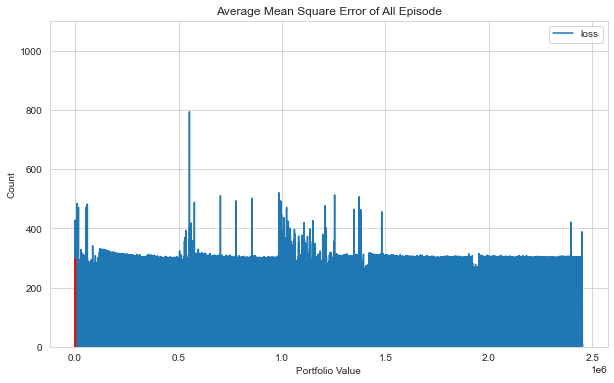

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

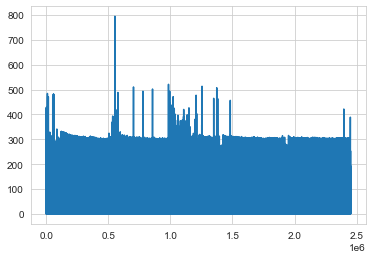

In [5]:
plt.plot(agent.model.losses)

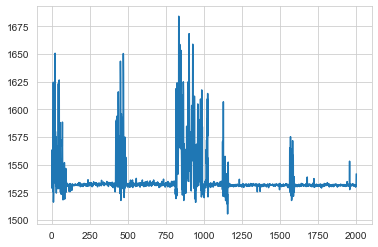

In [6]:
plt.plot(portfolio_value)

episode end value: 1004.28, duration: 0:00:00.059236
Sell: 47 times, Buy: 50 times


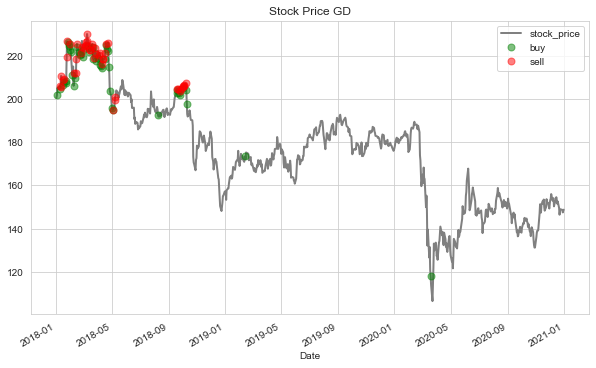

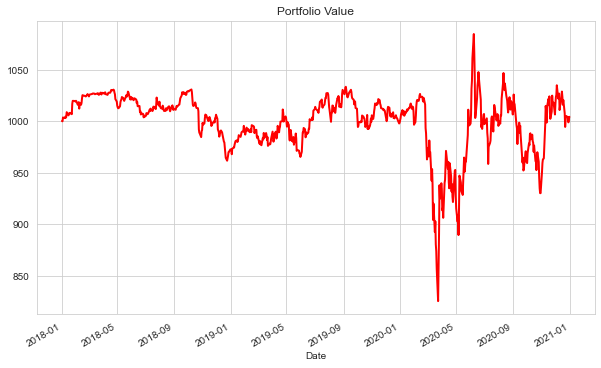

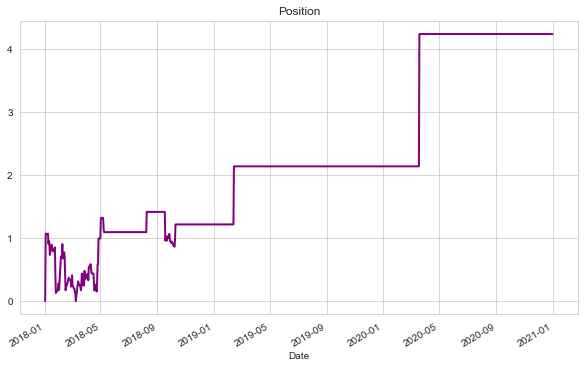

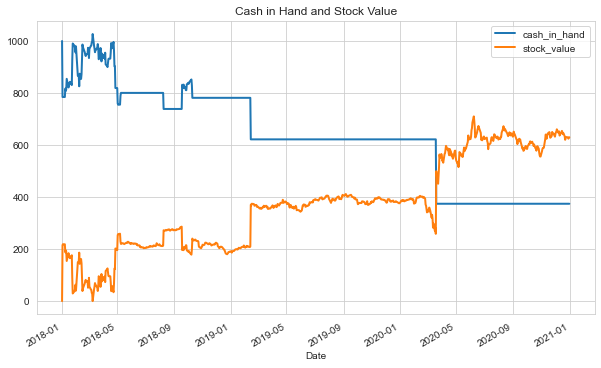

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: GD
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 0.14 %
Volatility: 0.1314
shape ratio: -0.0729
Maximun drawdown: -20.11 %
Calmar ratio: 0.0071
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -9.46 %
Volatility (benchmark): 0.2920
shape ratio: -0.3615
Maximun drawdown: -53.64 %
Calmar ratio (benchmark): -0.1763


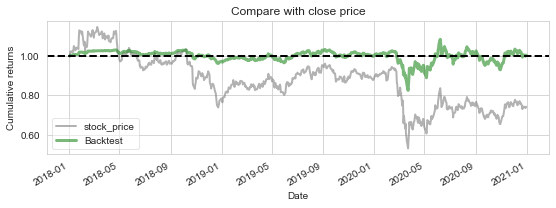

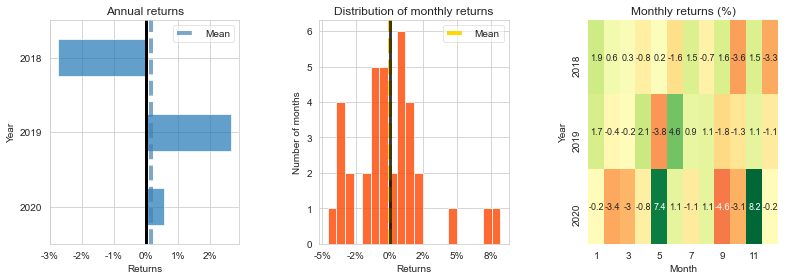

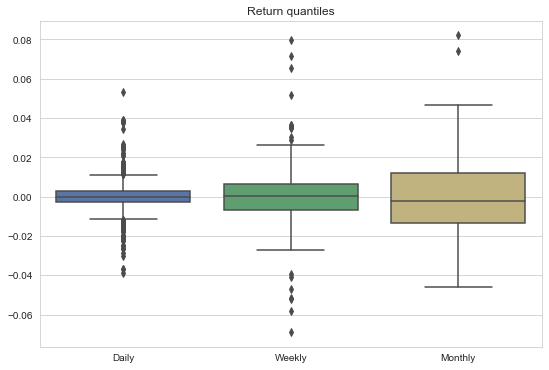

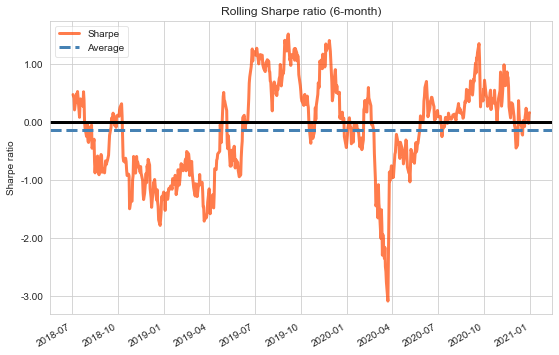

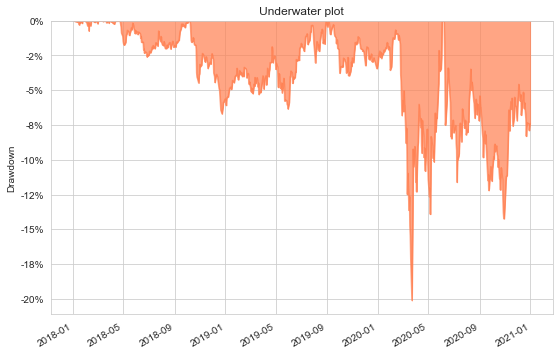

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')